In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression

###### Cодержание колонок регрессоров и колонки зависимой величины (B):

###### 9 columns

###### 25 rows

###### Index

###### A0, 1

###### A1, the maximum ground temperature,

###### A2, the minimum ground temperature,

###### A3, an index for the daily average ground temperature,

###### A4, the maximum air temperature,

###### A5, the minimum air temperature,

###### A6, an index for the daily average air temperature,

###### B, the daily quantity of evaporated water.

### Импорт и тд:

In [3]:
import pandas as pd
data = pd.read_table('table.csv', sep=';')

In [4]:
data.columns = ['I','A0','A1','A2','A3','A4','A5','A6','B']

In [5]:
new_row = {'I':1,'A0':1,'A1':84,'A2':65,'A3':149,'A4':86,'A5':61,'A6':159,'B':34}


In [6]:
print(data)


     I  A0  A1  A2   A3  A4  A5   A6   B
0    2   1  79  66  142  83  64  152  33
1    3   1  81  67  147  83  65  158  26
2    4   1  84  68  167  88  69  180  41
3    5   1  74  66  131  77  67  147   4
4    6   1  73  66  131  78  69  159   5
5    7   1  75  67  134  84  68  159  20
6    8   1  84  68  161  89  71  195  31
7    9   1  86  72  169  91  76  206  38
8   10   1  88  73  178  91  76  208  43
9   11   1  90  74  187  94  76  211  47
10  12   1  88  72  171  94  75  211  45
11  13   1  88  72  171  92  70  201  45
12  14   1  81  69  154  87  68  167  11
13  15   1  79  68  149  83  68  162  10
14  16   1  84  69  160  87  66  173  30
15  17   1  84  70  160  87  68  177  29
16  18   1  84  70  168  88  70  169  23
17  19   1  77  67  147  83  66  170  16
18  20   1  87  67  166  92  67  196  37
19  21   1  89  69  171  92  72  199  50
20  22   1  89  72  180  94  72  204  36
21  23   1  93  72  186  92  73  201  54
22  24   1  93  74  188  93  72  206  44
23  25   1  84  

In [7]:
del data['I']

In [8]:
del data['A0']

In [9]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      24 non-null     int64
 1   A2      24 non-null     int64
 2   A3      24 non-null     int64
 3   A4      24 non-null     int64
 4   A5      24 non-null     int64
 5   A6      24 non-null     int64
 6   B       24 non-null     int64
dtypes: int64(7)
memory usage: 1.4 KB


In [10]:
data.describe()

,A1,A2,A3,A4,A5,A6,B
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,83.916667,69.291667,161.041667,87.791667,69.458333,181.750000,31.166667
std,5.625382,2.742249,17.228589,4.951760,4.159632,22.004446,14.372881
min,73.000000,65.000000,131.000000,77.000000,59.000000,147.000000,4.000000
25%,80.500000,67.000000,147.000000,83.750000,67.000000,161.250000,22.250000
50%,84.000000,69.000000,163.500000,88.000000,69.000000,178.500000,32.000000
75%,88.000000,72.000000,171.000000,92.000000,72.000000,201.750000,43.250000
max,93.000000,74.000000,188.000000,94.000000,76.000000,211.000000,54.000000


### Делим датасет на тренировочный и тестовый, в соотношении 70:30:

In [11]:
from sklearn.model_selection import train_test_split
y= data['B']
x=data.drop('B',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [36]:
print(x_train)

    A1  A2   A3  A4  A5   A6
13  79  68  149  83  68  162
10  88  72  171  94  75  211
19  89  69  171  92  72  199
0   79  66  142  83  64  152
2   84  68  167  88  69  180
7   86  72  169  91  76  206
22  93  74  188  93  72  206
1   81  67  147  83  65  158
3   74  66  131  77  67  147
14  84  69  160  87  66  173
15  84  70  160  87  68  177
5   75  67  134  84  68  159
4   73  66  131  78  69  159
16  84  70  168  88  70  169
11  88  72  171  92  70  201
21  93  72  186  92  73  201


In [37]:
print(x_test)

    A1  A2   A3  A4  A5   A6
23  84  65  147  85  59  151
8   88  73  178  91  76  208
9   90  74  187  94  76  211
18  87  67  166  92  67  196
17  77  67  147  83  66  170
6   84  68  161  89  71  195
20  89  72  180  94  72  204
12  81  69  154  87  68  167


In [12]:
print(data)

    A1  A2   A3  A4  A5   A6   B
0   79  66  142  83  64  152  33
1   81  67  147  83  65  158  26
2   84  68  167  88  69  180  41
3   74  66  131  77  67  147   4
4   73  66  131  78  69  159   5
5   75  67  134  84  68  159  20
6   84  68  161  89  71  195  31
7   86  72  169  91  76  206  38
8   88  73  178  91  76  208  43
9   90  74  187  94  76  211  47
10  88  72  171  94  75  211  45
11  88  72  171  92  70  201  45
12  81  69  154  87  68  167  11
13  79  68  149  83  68  162  10
14  84  69  160  87  66  173  30
15  84  70  160  87  68  177  29
16  84  70  168  88  70  169  23
17  77  67  147  83  66  170  16
18  87  67  166  92  67  196  37
19  89  69  171  92  72  199  50
20  89  72  180  94  72  204  36
21  93  72  186  92  73  201  54
22  93  74  188  93  72  206  44
23  84  65  147  85  59  151  30


### График совместного распределения зависимой величины и какого-либо регрессора:

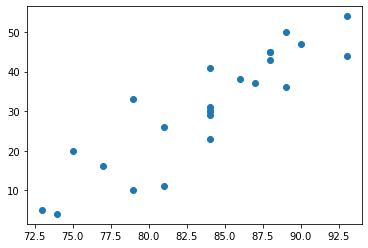

In [13]:

plt.scatter(data['A1'], data['B'])
plt.show()

### Гистограмма для проверки нормальности р-я зависимой величины:

(array([2., 2., 1., 2., 1., 5., 3., 2., 4., 2.]),
 array([ 4.,  9., 14., 19., 24., 29., 34., 39., 44., 49., 54.]),
 <BarContainer object of 10 artists>)

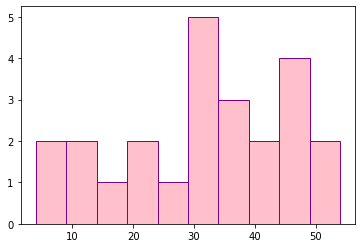

In [14]:
plt.hist(data['B'], color = 'pink', edgecolor = 'purple')


### Квантильный график для проверки нормальности р-я зависимой величины:

Text(0.5, 1.0, '"B" quantile plot')

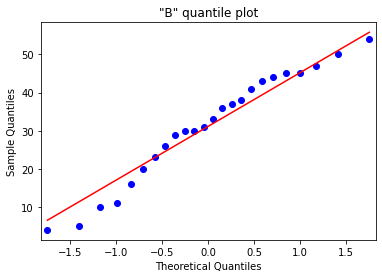

In [15]:

fig = plt.figure()
ax = fig.add_subplot()
sm.qqplot(data['B'], ax = ax, line='s')
ax.set_title ('"B" quantile plot')




### Плонтность распределения зависимой величины

<AxesSubplot:ylabel='Density'>

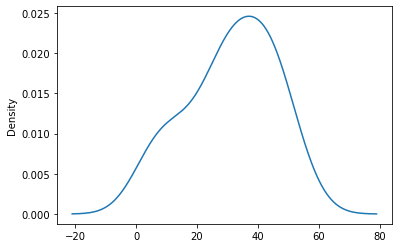

In [16]:
data['B'].plot(kind = 'density')

### Тест Шапиро-Вилка на нормальность распределения зависимой величины                                                                                                      (нулевая гипотеза - величина распределена нормально)

In [17]:

from scipy.stats import shapiro

shapiro(data['B'])

ShapiroResult(statistic=0.9536348581314087, pvalue=0.32417401671409607)

###### p_value>0,05, следовательно, нормальное распределение

### "Ящик с усами", ну или японские свечи (определяем статистические выбросы):

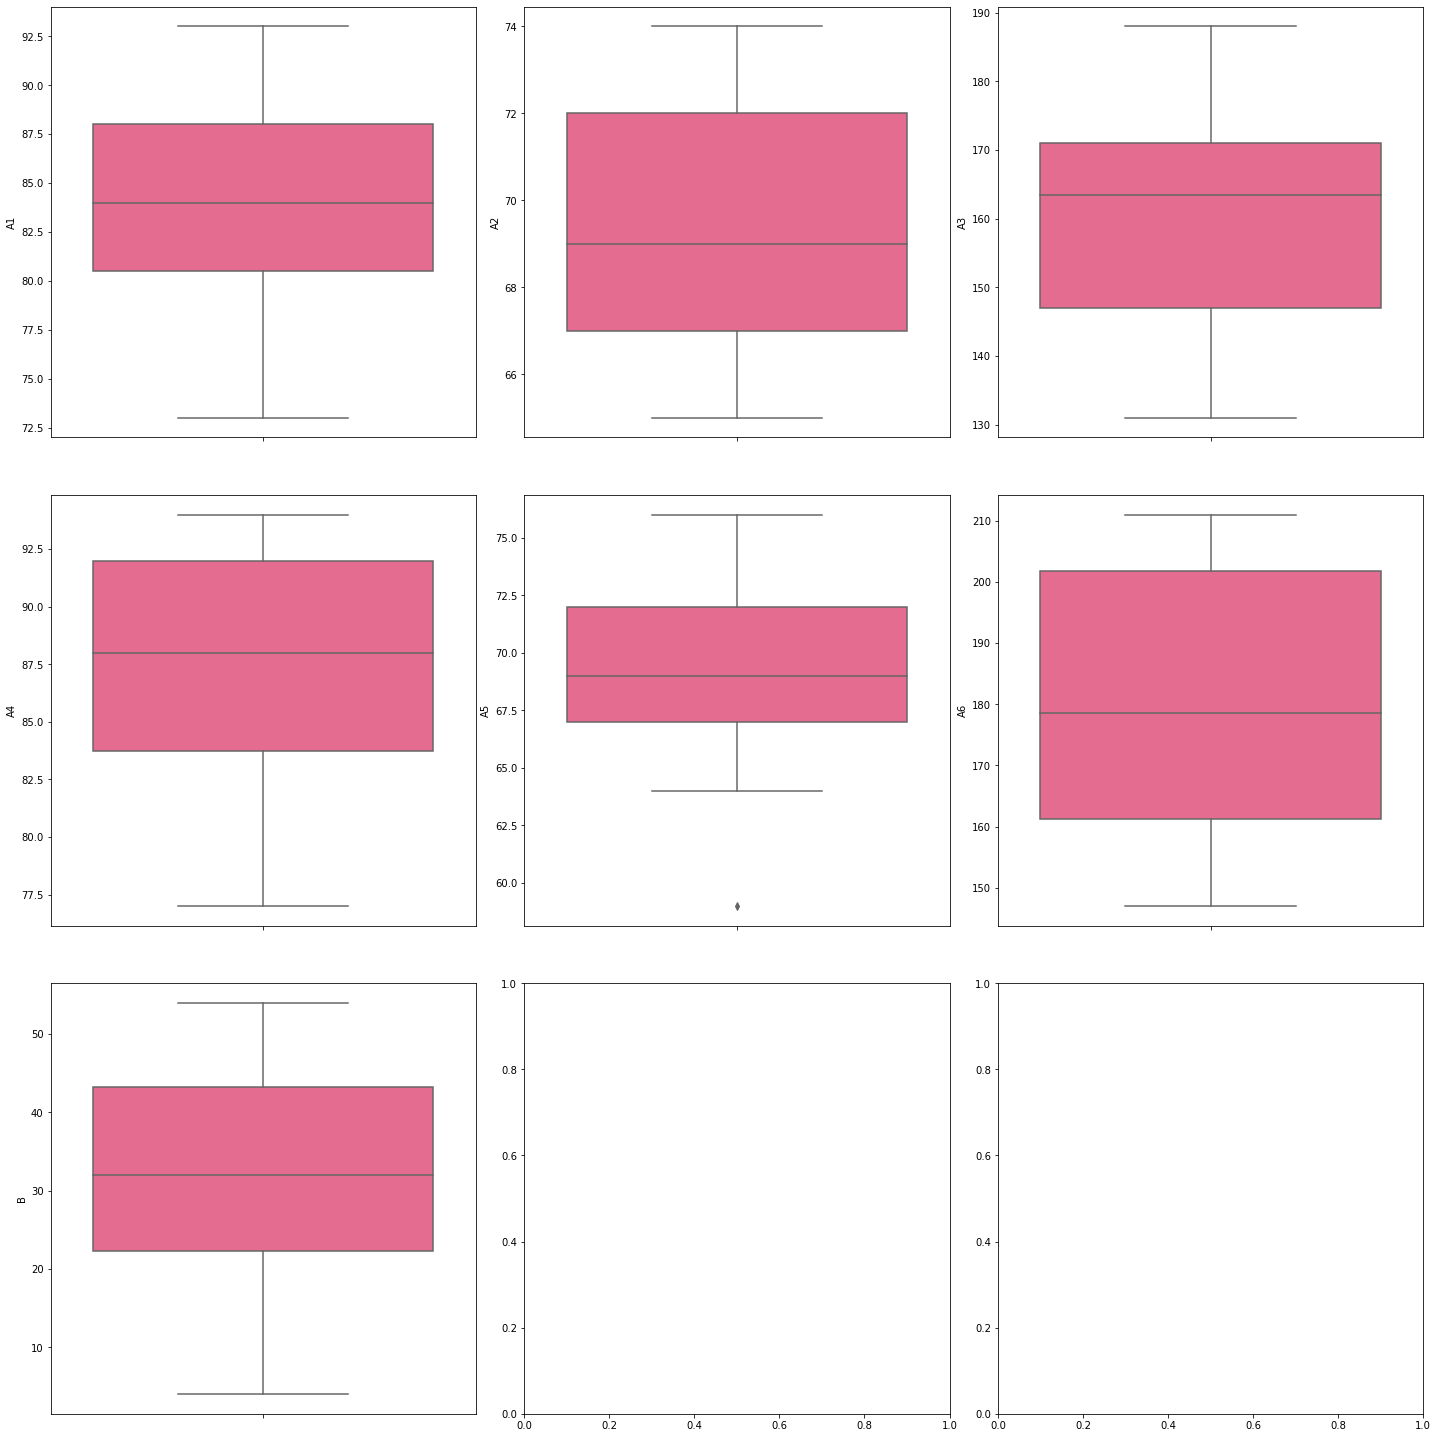

In [18]:

fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
index = 0
ax = ax.flatten()

for col, value in data.items():
    colors = ['#F85888']
    sns.boxplot(y=col, data=data, ax=ax[index], palette = colors)
    index +=1 
    plt.tight_layout(pad = 0.8, w_pad=0.5, h_pad=5.0)
    
   

### Тепловая карта корреляции:

<AxesSubplot:>

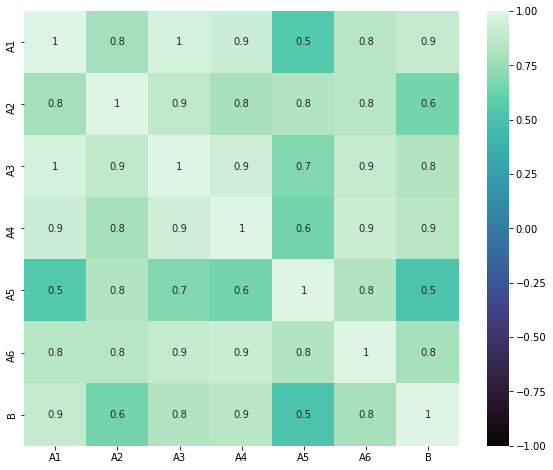

In [19]:

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True,fmt='.1g', vmin=-1, vmax=1, center= 0,cmap= 'mako',square=True)

#### Выберем столбец А5 -минимальную температуру воздуха

### Проверяем совместное распределение зависимой величины и выбранных регрессоров:

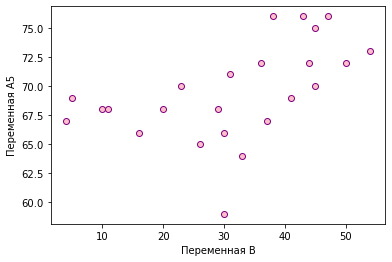

In [32]:
plt.scatter(data['B'], data['A5'], c='pink', edgecolor = 'purple')
plt.xlabel("Переменная B")
plt.ylabel("Переменная A5")
plt.show()

###### Функция для замены статистических выбросов (вроде их нет, так что то, что ниже, видимо некактульно))

In [161]:


      q75 = np.percentile(data['A5'],75)
      q25= np.percentile(data['A5'],25)
        
      q10 = np.percentile(data['A5'],10)
      q90 = np.percentile(data['A5'],90)
        
      intr_qr = q75-q25

      max = q75+(1.5*intr_qr)
      min = q25-(1.5*intr_qr)

      data.loc[data['A5']<min,'A5']=q10
      data.loc[data['A5']>max,'A5']=q90

In [41]:
df=x_train
del df['A1']
del df['A2']
del df['A3']
del df['A4']
del df['A6']

### Непонятно, почему

In [71]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [72]:
model = LinearRegression().fit(x_train, y_train)

In [73]:
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.2865869543101539


In [74]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -139.69181034482756
slope: [2.45689655]


### Вот здесь другое начинается

In [78]:
x = sm.add_constant(x_test)
  
result = sm.OLS(y_test, x).fit()
  

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     366.1
Date:                Fri, 17 Dec 2021   Prob (F-statistic):             0.0400
Time:                        22:38:42   Log-Likelihood:               -0.21367
No. Observations:                   8   AIC:                             14.43
Df Residuals:                       1   BIC:                             14.98
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        338.2817     55.314      6.116      0.1

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
